<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 10px; height: 55px">


# Capstone Project: Forecasting HDB Resale Prices


## Notebook 1/4: Data Cleaning and EDA
---

## Introduction

With more than 1 million flats spread across 24 towns and 3 estates, the Singapore brand of public housing is uniquely different. These flats spell home for over 80% of Singapore's resident population. Singaporeans have two main options when it comes to purchasing a HDB flat; they can either choose to buy a new flat from HDB (BTO) or a resale flat from the open market. Naturally, both types of flats come with their own pros and cons. 

There are reports stating that demand for resale flats has spiked in recent years, resulting in a reactionary increase in resale flat prices. According to the PropertyGuru Singapore Property Market Report Q2 2022, young families continue to gravitate towards the HDB resale market as a result of the latest round of BTO building delays and their unwillingness to wait through lengthy BTO completion periods, even though their prices are generally higher. Hence, we will be focusing on resale flats in this project.

In a [typical resale flat transaction](https://www.hdb.gov.sg/residential/buying-a-flat/buying-procedure-for-resale-flats/overview), an accurate valuation can only be requested after registering an **Intent to Buy** and obtaining an **Option to Purchase (OTP)**. This is not intuitive as this means that HDB will only provide the valuation after the price is agreed on. If the **Cash Over Valuation (COV)**, the difference between the sale price of the flat and its actual valuation by HDB, exceeds what buyers expect or budget for, they may find it hard to 'cough up' the **COV** in cash. The only way to get an estimate of the **COV** before this stage is through personal due diligence, even for property agents.

## Problem Statement

The aim of this project is to create a model that will give an accurate prediction of the actual valuation that can be utilized by everyone involved in a resale flat transaction, namely the buyers, sellers and property agents). This would inform the relevant parties whether a particular flat is undervalued or overvalued, and in turn give a good estimate of its potential COV.

---

## Data Sources and Description

- **[2012-2014](https://data.gov.sg/dataset/resale-flat-prices?resource_id=83b2fc37-ce8c-4df4-968b-370fd818138b):** Resale Flat Prices from March 2012 to December 2014

- **[2015-2016](https://data.gov.sg/dataset/resale-flat-prices?resource_id=1b702208-44bf-4829-b620-4615ee19b57c):** Resale Flat Prices from January 2015 to December 2016

- **[2017-](https://data.gov.sg/dataset/resale-flat-prices?resource_id=f1765b54-a209-4718-8d38-a39237f502b3):** Resale Flat Prices from January 2017 to July 2022

- **[mrt](https://github.com/hxchua/datadoubleconfirm/blob/master/datasets/mrtsg.csv):** MRT Station Information (Updated TE Line details + removed unused stations)

- **[malls](https://en.wikipedia.org/wiki/List_of_shopping_malls_in_Singapore):** Data on Shopping Malls in Singapore. (Updated inaccurate mall names + removed malls that closed)

- **[supermarkets](https://data.gov.sg/dataset/listing-of-licensed-supermarkets):** Listing of Licensed Supermarkets as at May 2021

- **[hawker_centres](https://data.gov.sg/dataset/hawker-centres):** Hawker Centre and Market locations in Singapore. Converted from KML file with location details

- **[parks](https://data.gov.sg/dataset/parks):** Park locations in Singapore. Converted from KML file with location details

- **[schools](https://data.gov.sg/dataset/school-directory-and-information):** School Directory and Information

---

## Getting Started

### Imports

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import datetime as dt

In [2]:
# Importing relevant csv files
df_1 = pd.read_csv('../data/2000-2012.csv')
df_2 = pd.read_csv('../data/2012-2014.csv')
df_3 = pd.read_csv('../data/2015-2016.csv')
df_4 = pd.read_csv('../data/2017-.csv')

### Combining Datasets

In [3]:
# First look at df_1
print(df_1.shape)
df_1.head()

(369651, 10)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [4]:
# First look at df_2
print(df_2.shape)
df_2.head()

(52203, 10)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [5]:
# First look at df_3
print(df_3.shape)
df_3.head()

(37153, 11)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
# First look at df_4
print(df_4.shape)
df_4.head()

(129331, 11)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [7]:
# Combining the dataframes
combined = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

In [8]:
# Shape and head of combined dataframe
print(combined.shape)
combined.head()

(588338, 11)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588338 entries, 0 to 588337
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                588338 non-null  object 
 1   town                 588338 non-null  object 
 2   flat_type            588338 non-null  object 
 3   block                588338 non-null  object 
 4   street_name          588338 non-null  object 
 5   storey_range         588338 non-null  object 
 6   floor_area_sqm       588338 non-null  float64
 7   flat_model           588338 non-null  object 
 8   lease_commence_date  588338 non-null  int64  
 9   resale_price         588338 non-null  float64
 10  remaining_lease      166484 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 49.4+ MB


### Processing the `month` column

In [10]:
# Creating a new 'date' column of datetime format 
combined['date'] = pd.to_datetime(combined['month'])

In [11]:
# Extracting the year and month from the date column
combined['year'] = pd.to_datetime(combined['date']).dt.year
combined['month'] = pd.to_datetime(combined['date']).dt.month

In [12]:
# Rearranging the columns
combined = combined[['date',
                     'year',
                     'month',
                     'town',
                     'flat_type',
                     'block',
                     'street_name',
                     'storey_range',
                     'floor_area_sqm',
                     'flat_model',
                     'lease_commence_date',
                     'remaining_lease',
                     'resale_price']]
print(combined.shape)
combined.head()


(588338, 13)


,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2000-01-01,2000,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,NaN,147000.0
1,2000-01-01,2000,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,NaN,144000.0
2,2000-01-01,2000,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,NaN,159000.0
3,2000-01-01,2000,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,NaN,167000.0
4,2000-01-01,2000,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,NaN,163000.0


In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588338 entries, 0 to 588337
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 588338 non-null  datetime64[ns]
 1   year                 588338 non-null  int64         
 2   month                588338 non-null  int64         
 3   town                 588338 non-null  object        
 4   flat_type            588338 non-null  object        
 5   block                588338 non-null  object        
 6   street_name          588338 non-null  object        
 7   storey_range         588338 non-null  object        
 8   floor_area_sqm       588338 non-null  float64       
 9   flat_model           588338 non-null  object        
 10  lease_commence_date  588338 non-null  int64         
 11  remaining_lease      166484 non-null  object        
 12  resale_price         588338 non-null  float64       
dtypes: datetime64[

### Feature 1: Town

The `town` column contains information for the different [planning areas](https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore#cite_note-7) of Singapore.

In [14]:
# List of towns in Singapore
combined['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL'], dtype=object)

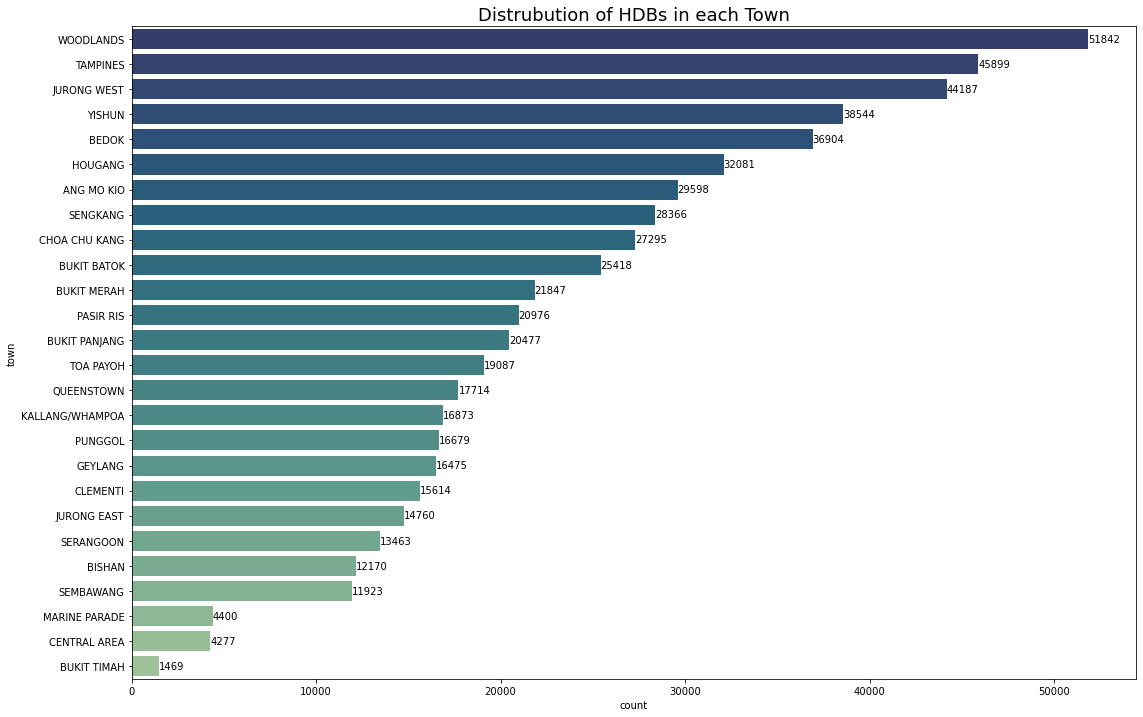

In [15]:
# Plotting a barplot of 'town' in descending order
plt.figure(figsize=(18,12))
ax = sns.countplot(y='town', data=combined, order=combined['town'].value_counts().index, palette='crest_r')
plt.title('Distrubution of HDBs in each Town', fontsize=18)
values = combined['town'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values);

[Bigger towns](https://www.wikiwand.com/en/Template:Largest_planning_areas_of_Singapore) (eg. Woodlands and Tampines) generally have more flats solds compared to smaller towns(eg. Sembawang). 

### Feature 2: Flat Type

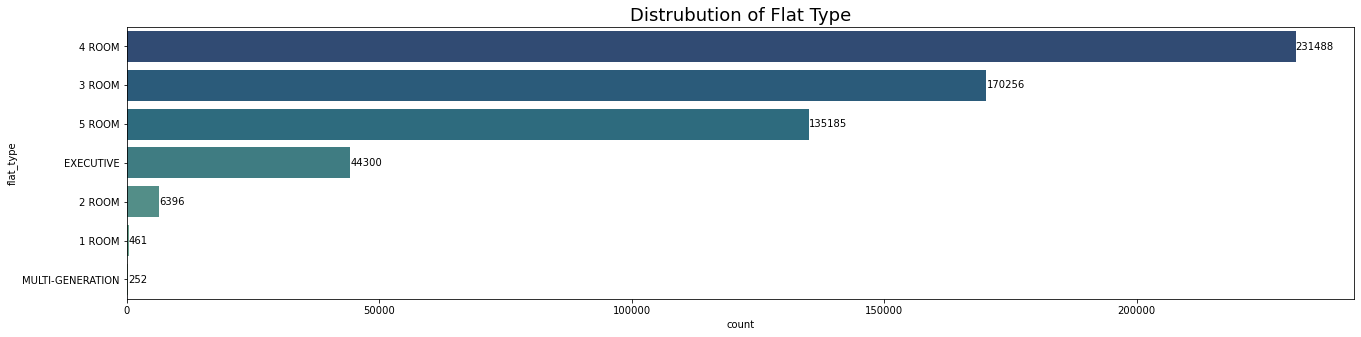

In [16]:
# Plotting a barplot of 'flat_type' in descending order
plt.figure(figsize=(22, 5))
ax = sns.countplot(y='flat_type', data=combined,
              order=combined['flat_type'].value_counts().index, palette='crest_r')
plt.title('Distrubution of Flat Type', fontsize=18)
values = combined['flat_type'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values);

In [17]:
# Number of rows with 'flat_type' = `Multi-Generation`, `2 room` and `1 room`
print(combined['flat_type'].value_counts().values[-3:].sum())

# Finding percentage of 2 room, 1 room and Multi-Generation flats in the dataset
print(round(combined['flat_type'].value_counts().values[-3:].sum() / combined['flat_type'].value_counts().values.sum() * 100, 2),'% of dataset')

7109
1.21 % of dataset


Only 1.2% of our data consists of `Multi-Generation`, `2 room` and `1 room` resale flats. (7109 of 588338 entries).
Hence, we should drop these rows as we do not have enough information to make an accurate prediction.
The remainder of our dataset will consist of `3 room`, `4 room`, `5 room`, and `Executive` resale flats.

In [18]:
# Extracting 3 room, 4 room and 5 room and executive flat from dataset 
combined = combined.loc[(combined['flat_type']=='3 ROOM') | (combined['flat_type']=='4 ROOM') | (combined['flat_type']=='5 ROOM') | (combined['flat_type']=='EXECUTIVE')]

print(combined.shape)
combined.head()

(581229, 13)


,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2000-01-01,2000,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,NaN,147000.0
1,2000-01-01,2000,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,NaN,144000.0
2,2000-01-01,2000,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,NaN,159000.0
3,2000-01-01,2000,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,NaN,167000.0
4,2000-01-01,2000,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,NaN,163000.0


### Feature 3: Storey Range

In [19]:
# Getting the value counts of `storey_range
combined['storey_range'].value_counts().sort_index()

01 TO 03    114985
01 TO 05      2670
04 TO 06    143460
06 TO 10      2442
07 TO 09    127891
10 TO 12    109616
11 TO 15      1249
13 TO 15     43063
16 TO 18     17326
16 TO 20       264
19 TO 21      7738
21 TO 25        92
22 TO 24      5035
25 TO 27      2426
26 TO 30        39
28 TO 30      1320
31 TO 33       465
31 TO 35         2
34 TO 36       430
36 TO 40         7
37 TO 39       408
40 TO 42       202
43 TO 45        45
46 TO 48        40
49 TO 51        14
Name: storey_range, dtype: int64

Most flats sold are between the 1st and 12th floor. There are many overlaps between the different storey ranges. This should be because information across the years were collected differently. Since `storey_range` is a catergorical feature, we will have to encode it in the later stages. Ordinal encoding should be used as it is common knowledge that flats on higher floors cost more than flats on lower floors. Upon close inspection, a natural ranking order can still be established even with the presence of overlaps. For example `16 TO 20` will have a higher rank than `16 TO 18` because it contains flats which are on the 19th and 20th storeys.

### Feature 4: Floor Area (Square Metres)

Note: We will be mixing in graphs and charts created in Tableau.

![floorarea](../plots/floorarea.png)

Most flat sizes are below 150sqm. A big majority of flats sold are between 64sqm to 127sqm.

### Feature 5: Flat Model

There are many different categories of flat models, some very similar to each other. We will narrow down the categories by grouping the similar ones together.

In [20]:
# Getting the value counts of 'flat_model'
combined['flat_model'].value_counts()

Model A                   173281
Improved                  153624
New Generation            104134
Premium Apartment          41275
Simplified                 32375
Apartment                  23974
Standard                   20690
Maisonette                 16183
Model A2                    9570
DBSS                        2714
Adjoined flat               1165
Model A-Maisonette          1003
Terrace                      423
Type S1                      375
Type S2                      193
Premium Apartment Loft        90
Premium Maisonette            85
Improved-Maisonette           74
3Gen                           1
Name: flat_model, dtype: int64

In [21]:
# Grouping similar flat_models together
replace_values = {'Improved': 'Standard',
                  'Model A2': 'Model A',
                  'Simplified': 'Model A',
                  'Improved-Maisonette': 'Maisonette',
                  'Premium Maisonette': 'Maisonette',
                  'Model A-Maisonette': 'Maisonette',
                  'Executive Maisonette': 'Maisonette',
                  'Premium Apartment': 'Apartment',
                  'Premium Apartment Loft': 'Apartment',
                  'Type S1': 'Special',
                  'Type S2': 'Special',
                  'Adjoined flat': 'Special',
                  '3Gen': 'Special',
                  'DBSS': 'Special',
                  'Terrace': 'Special'}

combined.replace({'flat_model': replace_values}, inplace=True)

combined['flat_model'].value_counts()

Model A           215226
Standard          174314
New Generation    104134
Apartment          65339
Maisonette         17345
Special             4871
Name: flat_model, dtype: int64

![modelcount](../plots/modelcount.png)

Flat models that are generally considered more 'premium' had lesser transactions. This should be because there is a limited quantity of such flats, and they are generally known to be more expensive.

### Feature 6: Lease Commencement Date

In [22]:
# Checking unique values
combined['lease_commence_date'].unique()

array([1986, 1976, 1977, 1981, 1979, 1984, 1980, 1978, 1985, 1993, 1982,
       1996, 1994, 1974, 1983, 1987, 1989, 1995, 1973, 1992, 1990, 1988,
       1975, 1971, 1969, 1967, 1970, 1972, 1968, 1991, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2018, 2017, 2019],
      dtype=int64)

![leasecount](../plots/leasecount.png)

There were a high number of flats built in 1985, 1988 and 1998. The reasons for this occurence should be inconsequencial to our project.

### Feature 7: Remaining Lease

There are many rows with missing values for `remaining_lease`. This is because this feature was only tracked from 2015 onwards. Hence, we will be filling in the missing values with estimated values. These values can be derived from deducting the least commencement date from the year sold.

In [23]:
# Replace NaN values with estimated values (year - lease_commence_date)
combined['remaining_lease'] = combined['remaining_lease'].fillna(99 - (combined['year'] - combined['lease_commence_date']))

The `remaining_lease` values from 2015 onwards are also in string format. We will need to convert them into float for modelling, with the unit being amount of years.

In [24]:
# Creating function to calculate remaining_lease in years
def get_years(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1:
            years = yearmonth[0] + (yearmonth[1]/12)
        else:
            years = yearmonth[0]
        return years
    else:
        return text

# Applying the function to the remaining_lease column
combined['remaining_lease'] = combined['remaining_lease'].apply(lambda x: get_years(x))

In [25]:
# Checking results
combined.tail()

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
588333,2022-06-01,2022,6,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,142.0,Apartment,1988,65.500000,755000.0
588334,2022-06-01,2022,6,YISHUN,EXECUTIVE,352,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65.166667,770000.0
588335,2022-06-01,2022,6,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65.166667,750000.0
588336,2022-06-01,2022,6,YISHUN,EXECUTIVE,608,YISHUN ST 61,01 TO 03,164.0,Apartment,1992,68.916667,1000000.0
588337,2022-06-01,2022,6,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,145.0,Maisonette,1987,64.583333,810000.0


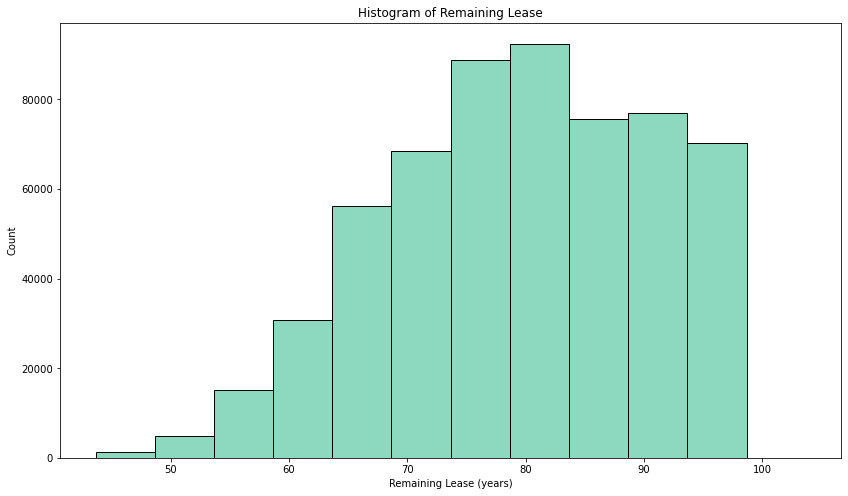

In [28]:
# Plotting histogram of spray dates
plt.figure(figsize=(14,8))
sns.histplot(data=combined, x='remaining_lease', color="mediumaquamarine", binwidth=5).set(title='Histogram of Remaining Lease', xlabel='Remaining Lease (years)', ylabel='Count');

There were more transactions of flats with a longer remaining lease. Transaction quantity drops significantly for flats with less than 70 years remaining.

### Feature 8: Date (Years and Months)

![yearstype](../plots/yearstype.png)

There was a steep drop in HDB salesafter 2010, probably because of the [steady increase](https://www.srx.com.sg/cooling-measures) in prices in that time period. We will explore this further in the next section. We can also see that there was indeed an increase in resale flat transactions over the past 7 years. (There is incomplete data for our current Year 2022, hence the decrease as the end)

![monthtype](../plots/monthtype.png)

HDB sales are also fairly constant throughout the respective months, other than November to February. My guess is that people generally do not purchase HDBs during the holiday period. We will see if this affects their resale prices in the next section.

### Features 9 and 10: Block and Street Name

In our second code notebook, we will engineer features relating to the unique addresses of our dataset. Some prior cleaning/combining is required before we move on to it.

In [29]:
# Replacing short form for Commonwealth with actual word
combined['street_name'] = combined['street_name'].str.replace('C\'WEALTH','COMMONWEALTH')

In [30]:
# Checking changes
combined[combined['street_name'].str.contains("COMMONWEALTH")]

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
1598,2000-01-01,2000,1,QUEENSTOWN,3 ROOM,87,COMMONWEALTH CL,10 TO 12,58.0,Standard,1967,33.000000,117000.0
1599,2000-01-01,2000,1,QUEENSTOWN,3 ROOM,86,COMMONWEALTH CL,04 TO 06,69.0,Standard,1967,33.000000,146000.0
1600,2000-01-01,2000,1,QUEENSTOWN,3 ROOM,85,COMMONWEALTH CL,04 TO 06,58.0,Standard,1967,33.000000,122000.0
1601,2000-01-01,2000,1,QUEENSTOWN,3 ROOM,84,COMMONWEALTH CL,07 TO 09,58.0,Standard,1967,33.000000,136000.0
1602,2000-01-01,2000,1,QUEENSTOWN,3 ROOM,81,COMMONWEALTH CL,07 TO 09,60.0,Standard,1967,33.000000,120500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587732,2022-06-01,2022,6,QUEENSTOWN,3 ROOM,97,COMMONWEALTH CRES,01 TO 03,59.0,Standard,1970,47.083333,293000.0
587733,2022-06-01,2022,6,QUEENSTOWN,3 ROOM,99,COMMONWEALTH CRES,01 TO 03,55.0,Standard,1970,47.083333,300000.0
587734,2022-06-01,2022,6,QUEENSTOWN,3 ROOM,51,COMMONWEALTH DR,10 TO 12,63.0,Model A,2015,91.750000,598000.0
587748,2022-06-01,2022,6,QUEENSTOWN,4 ROOM,50,COMMONWEALTH DR,07 TO 09,93.0,Model A,2015,91.750000,810000.0


In [31]:
# Creating a new address column
combined['address'] = combined['block'] + ' ' + combined['street_name']
combined.head()

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2000-01-01,2000,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Standard,1986,14.0,147000.0,170 ANG MO KIO AVE 4
1,2000-01-01,2000,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Standard,1986,14.0,144000.0,174 ANG MO KIO AVE 4
2,2000-01-01,2000,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24.0,159000.0,216 ANG MO KIO AVE 1
3,2000-01-01,2000,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24.0,167000.0,215 ANG MO KIO AVE 1
4,2000-01-01,2000,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,24.0,163000.0,218 ANG MO KIO AVE 1


In [32]:
# Calculating the no. of unique addresses
all_address = list(combined['address'])
print('Total No. Of Transactions:', len(all_address))

unique_address = list(set(all_address))
print('Unique Addresses:', len(unique_address))

Total No. Of Transactions: 581229
Unique Addresses: 9462


The 581,299 transactions in our dataset consist of flats from 9,462 unique addresses.

---

## Target Variable: Resale Price

We will now explore our target variable and its relationships with our features.

![histogram](../plots/price.png)

`resale_price` has a right skewed distribution. Majority of flats are sold within the $150k to $425k range.

![date](../plots/date.png)

Resale prices have been generally increasing across the years. In 2013, it experienced an obvious decline due to cooling measures implemented by our government. More infomation can be found [here](https://www.srx.com.sg/cooling-measures).

![town](../plots/towns.png)

Average resale prices differ across towns. At a glance, it seems that towns nearer to the central region of Singapore (Bukit Timah, Bishan, Central Area) have higher resale prices. ALso, Punggol is second on this list probably because the flats there are relatively newer.

![types](../plots/types.png)

Average prices increase as the tier of flat type increases, this is an expected observation.

![model](../plots/model.png)

Average prices also differ across different flat models. This is also expected as `Apartment`, `Maisonette` and `Special` are generally considered more premium compared to the other 3 models.

![storey](../plots/storey.png)

Another expected outcome, average prices increase as storey height increases.

![area](../plots/area.png)

The bigger the flat, the higher the price. The right half of the scatterplot seems more sparse than the left half. This should be mainly because there are significantly lesser flats above 160 sqm.

![lease](../plots/lease.png)

Flats with a more recent lease commencement date (newer flats) have a higher resale price than flats with an earlier one (older flats).

![month](../plots/month.png)

From the above graph, we can conclude the the month of sale does not affect resale prices.

### Conclusion

Most of our original features have obvious correlations to our target variable. We will aim to engineer more features in the next notebook to further strengthen the predictive ability of our models.

---
## Exporting The Dataset

In [33]:
# Rearranging the columns
combined = combined[['date',
                     'year',
                     'month',
                     'town',
                     'flat_type',
                     'block',
                     'street_name',
                     'address',
                     'storey_range',
                     'floor_area_sqm',
                     'flat_model',
                     'lease_commence_date',
                     'remaining_lease',
                     'resale_price']]
print(combined.shape)
combined.head()

(581229, 14)


,date,year,month,town,flat_type,block,street_name,address,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2000-01-01,2000,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,170 ANG MO KIO AVE 4,07 TO 09,69.0,Standard,1986,14.0,147000.0
1,2000-01-01,2000,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,174 ANG MO KIO AVE 4,04 TO 06,61.0,Standard,1986,14.0,144000.0
2,2000-01-01,2000,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24.0,159000.0
3,2000-01-01,2000,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,215 ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24.0,167000.0
4,2000-01-01,2000,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,218 ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,24.0,163000.0


In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581229 entries, 0 to 588337
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 581229 non-null  datetime64[ns]
 1   year                 581229 non-null  int64         
 2   month                581229 non-null  int64         
 3   town                 581229 non-null  object        
 4   flat_type            581229 non-null  object        
 5   block                581229 non-null  object        
 6   street_name          581229 non-null  object        
 7   address              581229 non-null  object        
 8   storey_range         581229 non-null  object        
 9   floor_area_sqm       581229 non-null  float64       
 10  flat_model           581229 non-null  object        
 11  lease_commence_date  581229 non-null  int64         
 12  remaining_lease      581229 non-null  float64       
 13  resale_price  

In [35]:
# Exporting dataset
combined.to_csv('../data/combined.csv',index=False)

---